In [283]:
#훈련 데이터 로드
import numpy as np
train_data = np.loadtxt("train.csv", delimiter=",", dtype=np.float32)
x_test = np.loadtxt("test.csv", delimiter=",", dtype=np.float32)

In [284]:
#X Y데이터 분리
print(train_data.ndim)
print(train_data.shape)
print(train_data.dtype)
y_train = train_data[:, 0]
x_train = train_data[:, 1:]
x_train = x_train/255
x_test = x_test/255
print(x_train.shape)
print(y_train.shape)

2
(42000, 785)
float32
(42000, 784)
(42000,)


In [285]:
def to_categori(y):
    #(42000,)
    y_len = y.shape
    y_len = (int(str(y_len[0])))

    result = np.zeros((y_len,10))
    for i in range (0,y_len):
        for j in range(0,10):
            if(y[i] == j):
                result[i,j]=1;
    return result

In [286]:
#Y데이터 원핫 인코딩
y_train = train_data[:, 0]
print(y_train.shape)
print(y_train[10])

y_train = to_categori(y_train)
print(y_train.shape)
print(y_train[10])


(42000,)
8.0
(42000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [287]:
#모델 학습
import keras
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

from keras import optimizers
model.compile(optimizer=optimizers.Adam(lr=0.0005), loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
42000/42000 [==============================] - 2s 56us/step - loss: 0.0291 - acc: 0.8202
Epoch 2/10
42000/42000 [==============================] - 1s 33us/step - loss: 0.0128 - acc: 0.9217
Epoch 3/10
42000/42000 [==============================] - 1s 33us/step - loss: 0.0106 - acc: 0.9339
Epoch 4/10
42000/42000 [==============================] - 1s 28us/step - loss: 0.0095 - acc: 0.9415
Epoch 5/10
42000/42000 [==============================] - 1s 29us/step - loss: 0.0086 - acc: 0.9478
Epoch 6/10
42000/42000 [==============================] - 1s 27us/step - loss: 0.0080 - acc: 0.9517
Epoch 7/10
42000/42000 [==============================] - 2s 37us/step - loss: 0.0074 - acc: 0.9553
Epoch 8/10
42000/42000 [==============================] - 2s 37us/step - loss: 0.0069 - acc: 0.9585
Epoch 9/10
42000/42000 [==============================] - 1s 27us/step - loss: 0.0065 - acc: 0.9617
Epoch 10/10
42000/42000 [==============================] - 1s 26us/step - loss: 0.0061 - acc: 0.9641

In [288]:
#성능 평가
result = model.evaluate(x_train, y_train)
print(result)

42000/42000 [==============================] - 2s 47us/step
[0.0056595086077036935, 0.9674761904761905]


In [289]:
#테스트셋 예측
y_test = model.predict(x_test)
print(y_test.shape)
print(y_test[0].shape)
print(y_test[0])


(28000, 10)
(10,)
[5.3517610e-06 5.7121273e-11 9.9997473e-01 1.8690493e-05 5.2150195e-10
 2.0984094e-08 2.0188523e-08 6.8745232e-10 1.1518476e-06 3.4470442e-09]


(28, 28)


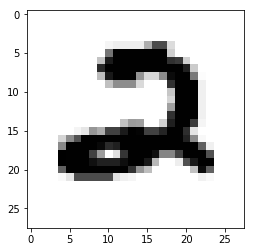

In [290]:
import matplotlib.pyplot as plt
digit = x_test[0]
digit = np.reshape(digit, (28,28))
print(digit.shape)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [291]:
def to_value(y):
    #(28000,10)
    y_len = y.shape
    y_len = (int(str(y_len[0])))
    
    result_y = np.zeros((y_len))
    
    for i in range(0,28000):
        max_y = 0
        for j in range(0,10):
            if(max_y < y[i,j]):
                max_y = y[i,j]
                result_y[i]=j
    return result_y
                

In [304]:
import pandas as pd
label = np.arange(1,28001,1)
label = np.array(label, ndmin=1)
print(label)
print(label.shape)

y = to_value(y_test)
y = np.array(y, ndmin=1)
y = y.astype('uint8')
print(y[0])
print(y.shape)



[    1     2     3 ... 27998 27999 28000]
(28000,)
2
(28000,)


In [305]:
#dataframe = [label, y_test]
#print(dataframe.shape)

dataframe = pd.DataFrame({'ImageId': label, 'Label': y})
dataframe.to_csv("submission.csv", index=False)